# Лекция 3: Библиотеки для глубинного обучения. Примитивы фреймворка Pytorch. 

#        Пример обучения нейронной сети в numpy

In [1]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

(0, 29973242.933475837)
(1, 26538444.333721254)
(2, 27087383.35231205)
(3, 27092469.68633136)
(4, 24223124.96869549)
(5, 18184298.714728467)
(6, 11693229.055111825)
(7, 6690588.0534684295)
(8, 3722394.4347030674)
(9, 2143617.8433708297)
(10, 1342753.9393856828)
(11, 923802.023288906)
(12, 690115.3697122226)
(13, 546864.1943766501)
(14, 450378.10604227113)
(15, 380125.76492929703)
(16, 325820.31828794087)
(17, 282142.7504828801)
(18, 246112.8380939326)
(19, 215900.58199744788)
(20, 190270.12186330784)
(21, 168377.10884768254)
(22, 149540.5342483205)
(23, 133253.52394772996)
(24, 119097.18463726282)
(25, 106741.32201570371)
(26, 95920.6541440394)
(27, 86398.07733669755)
(28, 77995.06174128281)
(29, 70549.10796195432)
(30, 63939.28960852581)
(31, 58051.35072331178)
(32, 52803.379479425996)
(33, 48109.740991265186)
(34, 43898.908489179914)
(35, 40110.93644167407)
(36, 36696.0724689448)
(37, 33613.2441018621)
(38, 30824.685559117854)
(39, 28298.76307438795)
(40, 26006.182236588713)
(41, 239

(332, 0.0006471711350934473)
(333, 0.0006131925705419381)
(334, 0.0005810224805008525)
(335, 0.0005505618005688311)
(336, 0.0005216896938694249)
(337, 0.0004943362112865993)
(338, 0.0004684334708675035)
(339, 0.00044389117054860396)
(340, 0.0004206436434677041)
(341, 0.0003986250757109914)
(342, 0.00037776475893697636)
(343, 0.0003579965789632394)
(344, 0.0003392666978096529)
(345, 0.000321529843001431)
(346, 0.0003047252677983933)
(347, 0.00028880203008344534)
(348, 0.00027371214294383267)
(349, 0.00025941831199323667)
(350, 0.0002458822558409856)
(351, 0.00023304809694904078)
(352, 0.00022088670850109392)
(353, 0.00020936624510282394)
(354, 0.00019845319612158877)
(355, 0.00018810581543670572)
(356, 0.00017830194356003394)
(357, 0.00016901214316809488)
(358, 0.00016021205565911766)
(359, 0.0001518712965908145)
(360, 0.00014396516165146996)
(361, 0.00013647277626005526)
(362, 0.00012937485932151238)
(363, 0.00012264756043300651)
(364, 0.00011626956729824281)
(365, 0.000110228210701160

# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от np.array, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [2]:
import torch

In [3]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [4]:
x


 1.7697e-37  0.0000e+00 -6.1169e-22
 4.5562e-41  1.5594e+28  4.5562e-41
 8.5041e-38  0.0000e+00  8.5042e-38
 0.0000e+00  1.5468e+28  4.5562e-41
 1.5468e+28  4.5562e-41  1.5468e+28
[torch.FloatTensor of size 5x3]

In [5]:
# Типы
torch.FloatTensor
torch.LongTensor

torch.LongTensor

In [6]:
x = torch.Tensor(5, 3).type(torch.FloatTensor)

In [7]:
# инициализируем тензор нормальным распределением
x = torch.randn(5, 3)

In [8]:
x


-0.5149  0.0050 -0.6129
-0.9345 -0.2189  1.3864
 0.4001 -1.0855 -1.0078
 0.2943 -2.2144 -0.2288
-1.1578  1.6276  0.7598
[torch.FloatTensor of size 5x3]

In [9]:
x.shape

torch.Size([5, 3])

In [10]:
x.size()

torch.Size([5, 3])

In [11]:
y = torch.rand(5, 3)

In [12]:
y


 0.0160  0.0190  0.5421
 0.7993  0.1395  0.7332
 0.5841  0.0078  0.4342
 0.9840  0.0788  0.7611
 0.1243  0.5920  0.1300
[torch.FloatTensor of size 5x3]

In [13]:
# Первый способ сложить 2 тензора
x + y


-0.4989  0.0240 -0.0708
-0.1351 -0.0794  2.1195
 0.9842 -1.0777 -0.5736
 1.2783 -2.1356  0.5323
-1.0335  2.2196  0.8899
[torch.FloatTensor of size 5x3]

In [14]:
# Второй способ сложить 2 тензора
x.add(y)


-0.4989  0.0240 -0.0708
-0.1351 -0.0794  2.1195
 0.9842 -1.0777 -0.5736
 1.2783 -2.1356  0.5323
-1.0335  2.2196  0.8899
[torch.FloatTensor of size 5x3]

In [15]:
# А еще можно так:
torch.add(x, y)


-0.4989  0.0240 -0.0708
-0.1351 -0.0794  2.1195
 0.9842 -1.0777 -0.5736
 1.2783 -2.1356  0.5323
-1.0335  2.2196  0.8899
[torch.FloatTensor of size 5x3]

In [16]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)


-0.4989  0.0240 -0.0708
-0.1351 -0.0794  2.1195
 0.9842 -1.0777 -0.5736
 1.2783 -2.1356  0.5323
-1.0335  2.2196  0.8899
[torch.FloatTensor of size 5x3]

In [17]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) 

[2. 2. 2. 2. 2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [18]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [19]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)


 2.1168  2.8030 -1.0155  0.0567
-1.5779 -5.0910  3.8203  3.9832
 2.3279  2.0008 -1.4888 -0.9675
 0.3814  0.1933  0.6712  1.3290
-5.2952  1.8325 -2.1381 -4.6962
[torch.FloatTensor of size 5x4]

In [33]:
# для python 3

#a @ b

Поменяем пару строчек в обучении на np и код уже можно запускать и на GPU

In [34]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):

    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 26811702.2077
1 19358260.1044
2 14946289.8306
3 11655186.503
4 8910147.66555
5 6654651.88663
6 4871036.95776
7 3541395.1426
8 2581427.97615
9 1908341.16055
10 1436886.688
11 1105767.18448
12 869867.232502
13 698650.758405
14 571450.328329
15 474861.815456
16 399883.102196
17 340424.293194
18 292462.171502
19 253090.919296
20 220329.055773
21 192782.71287
22 169429.974598
23 149462.297235
24 132293.036962
25 117435.729525
26 104560.672921
27 93339.7926465
28 83500.1297075
29 74852.8130732
30 67240.2070823
31 60524.1394016
32 54566.3755073
33 49273.4809013
34 44558.6549468
35 40348.7714138
36 36582.4659994
37 33209.114177
38 30180.8896726
39 27457.6674353
40 25006.7851886
41 22796.7952459
42 20800.0776156
43 18994.8400223
44 17360.821898
45 15880.3766036
46 14537.4067394
47 13318.1958159
48 12210.3093531
49 11202.0089316
50 10283.043049
51 9445.17979098
52 8680.41803037
53 7982.05449672
54 7343.96223209
55 6760.67993201
56 6227.18779809
57 5738.63461862
58 5291.10699248
59 4881.0197174

# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [35]:
# Variable - обертка над тензором, содержащая значения градиента и еще немного полезной информации
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [36]:
x.data


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [37]:
x.grad

In [38]:
# производная операции, которая породила переменную.
x.grad_fn

In [39]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

В новой версии pytorch промежуточные градиенты не сохраняются.
Но если мы хотим все-таки увидеть их значения можно использовать
функцию variable.register_hook(print)
или использовать Variable.retain_grad()

In [40]:
from __future__ import print_function
# print (y.grad is None)
y.register_hook(print)

In [41]:
z = y * y * 2
z
# print (z.grad is None)
z.register_hook(print)

In [42]:
out = z.mean()
out

Variable containing:
 18
[torch.FloatTensor of size 1]

In [43]:
# Запускаем бэкпроп
# На выходе получаем градиенты из хуков
out.backward()

Variable containing:
 0.2500  0.2500
 0.2500  0.2500
[torch.FloatTensor of size 2x2]

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [44]:

# x.grad

In [45]:
v = torch.autograd.Variable(torch.randn(3), requires_grad=True)
v2 = v+1
v2.retain_grad()
v2.sum().backward()
v2.grad

Variable containing:
 1
 1
 1
[torch.FloatTensor of size 3]

# Что произошло?

autograd строит ациклический граф вычисления из переменных и операций (функций)
out.backward проходит по всему графу начиная от вершины out и считает градиенты вершин

Если мы хотим сохранить значения переменных в графе, то используем retain_graph = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [46]:
f = Variable(torch.Tensor([2,3]), requires_grad=True)
g = f[0] * f[1]
g.backward(retain_graph=True)
f.grad
g.backward()
f.grad

Variable containing:
 6
 4
[torch.FloatTensor of size 2]

In [47]:
f = Variable(torch.Tensor([2,3]), requires_grad=True)
g = f[0] * f[1]
g.backward()
f.grad
g.backward()
f.grad

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [48]:
x = Variable(torch.ones(2, 2), requires_grad = True)
y = x + 2
y.backward(torch.ones(2, 2), retain_graph=True)
x.grad



Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [49]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input



# Снова вернемся к исходной двухслойной сети

In [50]:
import torch
from torch.autograd import Variable

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)


w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])
    
    # Обнуляем градиенты
    if w1.grad is not None:
        w1.grad.data.zero_()
    if w2.grad is not None:
        w2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

0 30880294.0
1 26504802.0
2 26314416.0
3 26194824.0
4 23904942.0
5 18691048.0
6 12649182.0
7 7592101.5
8 4374665.0
9 2564188.25
10 1611377.25
11 1100949.75
12 813393.5625
13 637192.1875
14 519443.3125
15 434531.71875
16 369618.15625
17 317921.0
18 275623.25
19 240435.25
20 210770.078125
21 185583.234375
22 164046.875
23 145516.21875
24 129494.632812
25 115596.398438
26 103458.75
27 92820.875
28 83458.6796875
29 75201.1328125
30 67903.9921875
31 61421.3320312
32 55661.5273438
33 50523.609375
34 45906.9179688
35 41772.7539062
36 38062.0664062
37 34724.890625
38 31718.7109375
39 29006.3945312
40 26563.0546875
41 24353.6503906
42 22350.4707031
43 20534.0117188
44 18883.1992188
45 17380.3085938
46 16009.6748047
47 14759.2939453
48 13618.0048828
49 12574.6611328
50 11619.2324219
51 10744.0810547
52 9941.66894531
53 9205.38085938
54 8528.54882812
55 7905.77294922
56 7332.60888672
57 6805.49951172
58 6319.68457031
59 5871.53417969
60 5457.7265625
61 5075.56640625
62 4722.08837891
63 4395.14062

444 0.000124052501633
445 0.000121864679386
446 0.000119645803352
447 0.000117228439194
448 0.000115174683742
449 0.000113059781143
450 0.000110979468445
451 0.000108720632852
452 0.000106815765321
453 0.000104943173937
454 0.000102864396467
455 0.000101150340925
456 9.94043875835e-05
457 9.79577816906e-05
458 9.59306271398e-05
459 9.45009815041e-05
460 9.30623791646e-05
461 9.12605828489e-05
462 8.9650049631e-05
463 8.8312131993e-05
464 8.68659553817e-05
465 8.54246609379e-05
466 8.40124703245e-05
467 8.28848205856e-05
468 8.15067251096e-05
469 8.02315262263e-05
470 7.91284546722e-05
471 7.78571920819e-05
472 7.65161457821e-05
473 7.52814812586e-05
474 7.39511378924e-05
475 7.27810256649e-05
476 7.15645583114e-05
477 7.083833043e-05
478 6.95378839737e-05
479 6.86810381012e-05
480 6.74719558447e-05
481 6.63563041599e-05
482 6.57006967231e-05
483 6.48602072033e-05
484 6.37479752186e-05
485 6.28797497484e-05
486 6.19463535259e-05
487 6.10716015217e-05
488 5.98508086114e-05
489 5.91285643

# Наконец, в PyTorch базовые слои нейронных сетей уже реализованы.

In [51]:
from torch.autograd import Variable

N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 873.80291748
1 555.065307617
2 358.621124268
3 235.398086548
4 156.786331177
5 105.826255798
6 72.294960022
7 49.925868988
8 34.8143539429
9 24.4885158539
10 17.3595542908
11 12.3918056488
12 8.90099811554
13 6.42951440811
14 4.66782236099
15 3.40438461304
16 2.49326109886
17 1.83290994167
18 1.35213148594
19 1.00063455105
20 0.74267989397
21 0.552712678909
22 0.412365615368
23 0.308370351791
24 0.231099277735
25 0.173540428281
26 0.130563050508
27 0.0984024479985
28 0.0742868036032
29 0.0561684817076
30 0.0425319448113
31 0.0322506017983
32 0.0244866721332
33 0.0186148099601
34 0.0141676906496
35 0.0107951620594
36 0.00823397282511
37 0.00628681387752
38 0.00480480492115
39 0.00367544195615
40 0.00281398859806
41 0.00215626787394
42 0.00165358232334
43 0.00126905320212
44 0.000974633207079
45 0.000749054015614
46 0.0005760511267
47 0.00044330052333
48 0.00034133499139
49 0.000262994726654
50 0.000202736744541
51 0.000156375972438
52 0.000120676464576
53 9.31657268666e-05
54 7.197041

399 1.70822796013e-12
400 1.80426225176e-12
401 1.81556787833e-12
402 1.82295086144e-12
403 1.67196053009e-12
404 1.72068023892e-12
405 1.66577971035e-12
406 1.54673604653e-12
407 1.51281873313e-12
408 1.53374643715e-12
409 1.41203823807e-12
410 1.43574149965e-12
411 1.47736792418e-12
412 1.54633185596e-12
413 1.52651437497e-12
414 1.4252967296e-12
415 1.57096666405e-12
416 1.55148224996e-12
417 1.63386079839e-12
418 1.71561484637e-12
419 1.58535793e-12
420 1.57600430102e-12
421 1.61618049672e-12
422 1.61914340442e-12
423 1.58153459946e-12
424 1.63022742007e-12
425 1.70175353843e-12
426 1.63116417075e-12
427 1.52469378269e-12
428 1.48281061908e-12
429 1.56416221121e-12
430 1.41530905919e-12
431 1.38531222084e-12
432 1.31249546821e-12
433 1.33145946525e-12
434 1.52766362928e-12
435 1.49957498675e-12
436 1.5270668844e-12
437 1.41150654533e-12
438 1.36204610958e-12
439 1.40678809747e-12
440 1.39493646668e-12
441 1.46018288606e-12
442 1.45019087884e-12
443 1.32556834433e-12
444 1.345365008

In [52]:
loss_fn(model(x), y)

Variable containing:
1.00000e-12 *
  1.4435
[torch.FloatTensor of size 1]

# А еще там есть уже готовые оптимизаторы, такие как GD, SGD, ADAM, etc.

In [53]:
N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out),

        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

0 903.109436035
1 888.18371582
2 873.397644043
3 858.752746582
4 844.252624512
5 829.89831543
6 815.69128418
7 801.634094238
8 787.728149414
9 773.974731445
10 760.375488281
11 746.931396484
12 733.644104004
13 720.513305664
14 707.541625977
15 694.728820801
16 682.075561523
17 669.581481934
18 657.249267578
19 645.076721191
20 633.065612793
21 621.21496582
22 609.52532959
23 597.995544434
24 586.626586914
25 575.417419434
26 564.367614746
27 553.476806641
28 542.744018555
29 532.168395996
30 521.749938965
31 511.487426758
32 501.379638672
33 491.425994873
34 481.624938965
35 471.975891113
36 462.47744751
37 453.128967285
38 443.928466797
39 434.874633789
40 425.966430664
41 417.203094482
42 408.582946777
43 400.104156494
44 391.76574707
45 383.566131592
46 375.503479004
47 367.577362061
48 359.785705566
49 352.126586914
50 344.599090576
51 337.201934814
52 329.932617188
53 322.790679932
54 315.774047852
55 308.881317139
56 302.110931396
57 295.461639404
58 288.931640625
59 282.5194702

444 1.08328949864e-05
445 1.01207015177e-05
446 9.44437033468e-06
447 8.81821506482e-06
448 8.22866149974e-06
449 7.68178961152e-06
450 7.16378826837e-06
451 6.68554866934e-06
452 6.23423920842e-06
453 5.81412950851e-06
454 5.42160523764e-06
455 5.05301795783e-06
456 4.70984195999e-06
457 4.39025598098e-06
458 4.09094900533e-06
459 3.81282734452e-06
460 3.55142515218e-06
461 3.30518832925e-06
462 3.08003268401e-06
463 2.86747967948e-06
464 2.67049927061e-06
465 2.48385345003e-06
466 2.31073136092e-06
467 2.15037516682e-06
468 2.00043245968e-06
469 1.8610138568e-06
470 1.72965189904e-06
471 1.60798106208e-06
472 1.49539505401e-06
473 1.39104565733e-06
474 1.2928421711e-06
475 1.20060315112e-06
476 1.11555959847e-06
477 1.03534443952e-06
478 9.61969590207e-07
479 8.93999583695e-07
480 8.29364523725e-07
481 7.69327755279e-07
482 7.14142629477e-07
483 6.62072181967e-07
484 6.15467968146e-07
485 5.70636132124e-07
486 5.29190799625e-07
487 4.90063655434e-07
488 4.54202535138e-07
489 4.217783

In [54]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [55]:
# Сохранение

def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
epoch =1    
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict(),
        })

In [56]:
# Пример загрузки

checkpoint = torch.load('checkpoint.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Модели с произвольно сложной архитектурой

In [58]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.layer1 = 
#         self.layer2 = 

#     def forward(self, x):
#         pass

## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). PyTorch имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.


Примеры особых точек


left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: 1466.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 1. 34.]
 [-1. 45.]
 [ 0. 56.]
 [ 1. 66.]]


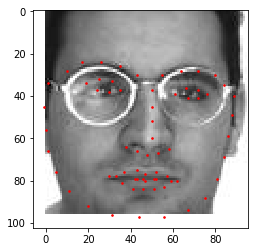

In [59]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 500
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для нового класса датасета нужно отнаследоваться от класса Dataset и реализовать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент




In [60]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (96, 96) (68, 2)


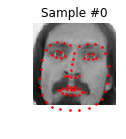

1 (96, 96) (68, 2)


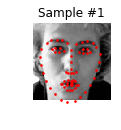

2 (96, 96) (68, 2)


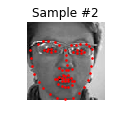

3 (96, 96) (68, 2)


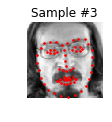

In [61]:
face_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                    root_dir='dataset/train')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [62]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

Приведем изображение к 68x68 и вырежем случайную область 60x60

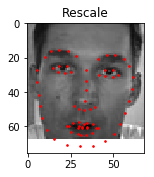

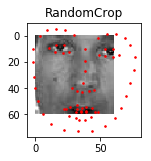

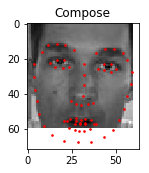

In [63]:
scale = Rescale(68)
crop = RandomCrop(60)
composed = transforms.Compose([Rescale(68),
                               RandomCrop(60)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

## Итерирование по датасету

In [64]:
transformed_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                           root_dir='dataset/train/',
                                           transform=transforms.Compose([
                                               Rescale(68),
                                               RandomCrop(60),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([60, 60]) torch.Size([68, 2])
1 torch.Size([60, 60]) torch.Size([68, 2])
2 torch.Size([60, 60]) torch.Size([68, 2])
3 torch.Size([60, 60]) torch.Size([68, 2])


Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


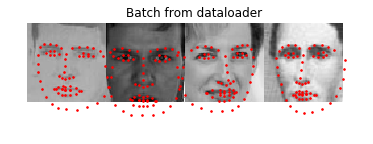

In [65]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose(1,0,2).reshape(im_size, -1), cmap="gray")

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [66]:
import pandas as pd

In [67]:
pd.read_csv("dataset/train/face_landmarks.csv")

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0.jpeg,10,43,9,53,8,64,8,74,10,...,47,78,56,80,47,77,43,77,39,77
1,1.jpeg,9,32,8,42,9,52,12,62,15,...,48,74,53,76,48,77,46,77,42,77
2,10.jpeg,4,34,5,44,6,54,9,64,14,...,50,70,56,72,50,72,47,72,43,72
3,100.jpeg,12,41,13,51,15,60,17,70,21,...,54,72,61,71,54,73,51,73,47,73
4,1000.jpeg,8,46,9,55,10,64,12,73,16,...,54,65,62,70,54,72,50,72,46,71
5,1001.jpeg,10,38,12,48,14,58,16,66,19,...,51,68,60,71,52,76,48,76,44,76
6,1002.jpeg,5,30,5,42,6,53,7,63,9,...,49,79,57,81,49,81,44,81,39,80
7,1003.jpeg,11,36,13,46,15,56,18,66,21,...,54,73,62,73,54,77,50,77,45,77
8,1004.jpeg,8,31,8,41,9,51,10,61,14,...,48,76,55,77,48,75,44,75,41,73
9,1005.jpeg,15,36,16,45,17,53,19,61,22,...,48,66,54,69,48,70,45,70,42,69
